# Import data for Banovich_Kropski_2020/haberman, disease samples:

In [3]:
import scanpy as sc
import anndata
import scIB
import pandas as pd

In [9]:
adata = sc.read('/mnt/scratch/haberman/GSE135893_matrix.mtx.gz')

In [11]:
adata = adata.T

In [22]:
adata.var = pd.read_csv('/mnt/scratch/haberman/GSE135893_genes.tsv.gz', names=['gene'], index_col='gene')

In [31]:
adata.obs = pd.read_csv('/mnt/scratch/haberman/GSE135893_barcodes.tsv.gz', names=['barcode'], index_col='barcode')

In [26]:
metadata = pd.read_csv('/mnt/scratch/haberman/GSE135893_IPF_metadata.csv.gz', index_col=0)

In [36]:
adata.obs = adata.obs.join(metadata)

In [53]:
diseased = adata[adata.obs.Status=='Disease']

In [51]:
scIB.pp.summarize_counts(adata)

IndexError: index (220212) out of range

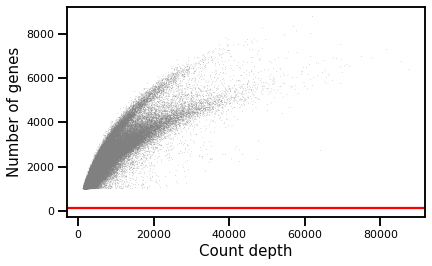

Counts Threshold: (0, 30000)


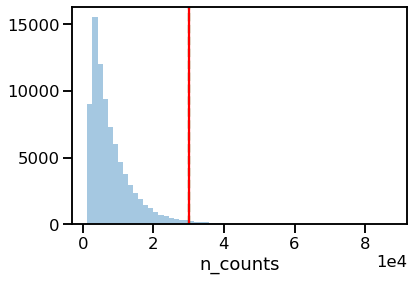

upper threshold: 30000


/home/daniel/.conda/envs/scop/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


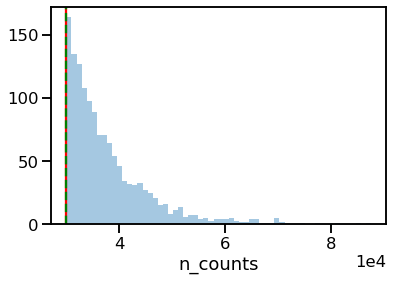

Gene Threshold: (150, 5000)


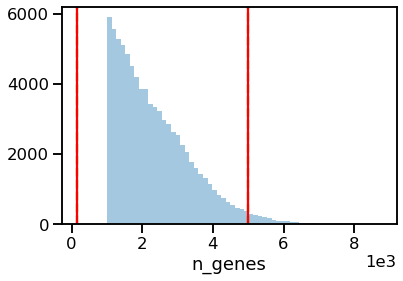

lower threshold: 150


/home/daniel/.conda/envs/scop/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/daniel/.conda/envs/scop/lib/python3.7/site-packages/seaborn/distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/daniel/.conda/envs/scop/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


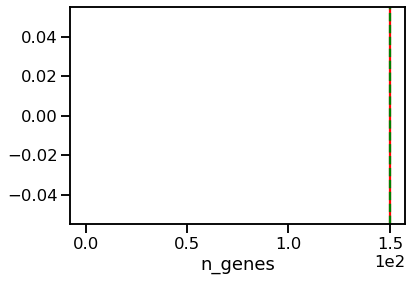

upper threshold: 5000


/home/daniel/.conda/envs/scop/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


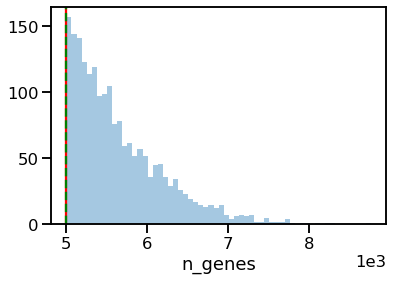

In [56]:
scIB.pp.plot_QC(diseased, gene_threshold=(150,5000), count_threshold=(0,30000))

In [48]:
adata

AnnData object with n_obs × n_vars = 220213 × 33694
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'seurat_clusters', 'population', 'celltype', 'n_counts', 'log_counts', 'n_genes', 'percent_mito'

In [49]:
sc.pp.filter_cells(adata, min_genes=200)

/home/daniel/.conda/envs/scop/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [57]:
sc.pp.filter_cells(diseased, max_counts=55000)

Trying to set attribute `.obs` of view, copying.
/home/daniel/.conda/envs/scop/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [58]:
diseased

AnnData object with n_obs × n_vars = 82692 × 33694
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'seurat_clusters', 'population', 'celltype', 'n_counts', 'log_counts', 'n_genes', 'percent_mito'

In [60]:
diseased.obs['condition']=diseased.obs.Diagnosis
diseased.obs['subject_id']=diseased.obs.Sample_Name
diseased.obs['study']='Banovich2020'
diseased.obs['dataset']=diseased.obs.study
diseased.obs['original_celltype_ann'] = diseased.obs.celltype


In [65]:
diseased.obs.iloc[:,-5:]

,condition,subject_id,study,dataset,original_celltype_ann
barcode,,,,,
F00431_AAACCTGAGATCCGAG,IPF,TILD001,Banovich2020,Banovich2020,Macrophages
F00431_AAACCTGAGTTTCCTT,IPF,TILD001,Banovich2020,Banovich2020,PLIN2+ Fibroblasts
F00431_AAACGGGTCTCGCTTG,IPF,TILD001,Banovich2020,Banovich2020,Myofibroblasts
F00431_AAAGATGAGCCCGAAA,IPF,TILD001,Banovich2020,Banovich2020,Smooth Muscle Cells
F00431_AAAGATGCACTTAAGC,IPF,TILD001,Banovich2020,Banovich2020,PLIN2+ Fibroblasts
...,...,...,...,...,...
F01392_TTTGGTTTCTCTTGAT,IPF,VUILD65,Banovich2020,Banovich2020,SCGB3A2+
F01392_TTTGTCACACCCAGTG,IPF,VUILD65,Banovich2020,Banovich2020,MUC5AC+ High
F01392_TTTGTCACAGATGGGT,IPF,VUILD65,Banovich2020,Banovich2020,Ciliated


In [67]:
diseased.obs['sample']=diseased.obs.subject_id

In [69]:
whole_obs = diseased.obs

In [70]:
diseased.obs = diseased.obs.iloc[:,-6:]

In [71]:
diseased.write('/mnt/scratch/haberman.h5ad')

... storing 'study' as categorical
... storing 'dataset' as categorical


# Load and subset data

In [13]:
import scanpy as sc
import anndata
import pandas as pd
import numpy as np

In [4]:
adata = sc.read('../../../data/HLCA_extended/extension_datasets/ready/full/haberman.h5ad')
gene_set = pd.read_csv('genes_for_mapping.csv')

In [6]:
adata

AnnData object with n_obs × n_vars = 82692 × 33694
    obs: 'condition', 'subject_id', 'study', 'dataset', 'original_celltype_ann', 'sample'

In [7]:
cd ../scripts

/mnt/znas/icb_zstore01/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/scripts


In [8]:
import preprocessing as pp

In [9]:
cd ../query_datasets/

/mnt/znas/icb_zstore01/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/query_datasets


In [10]:
adata_sub = pp.subset_and_pad_adata(gene_set, adata)

/home/icb/malte.luecken/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [15]:
for col in adata.obs.columns:
    print(col)
    adata.obs[col].value_counts()

condition


IPF            57668
NSIP            8597
cHP             7535
Sarcoidosis     4886
ILD             4006
Name: condition, dtype: int64

subject_id


VUILD59    15141
VUILD60     8461
VUILD61     8400
VUILD58     6785
TILD015     6401
VUILD62     5476
TILD028     4393
TILD019     4006
TILD006     3313
VUILD65     3189
TILD030     3082
VUILD55     2745
TILD001     2128
VUILD63     2123
VUILD57     1804
TILD010     1584
VUILD64     1419
VUILD53     1116
VUILD54      750
VUILD48      376
Name: subject_id, dtype: int64

study


Banovich2020    82692
Name: study, dtype: int64

dataset


Banovich2020    82692
Name: dataset, dtype: int64

original_celltype_ann


Macrophages                       26892
Ciliated                          12550
Endothelial Cells                  6482
AT2                                4916
T Cells                            4081
Monocytes                          3911
SCGB3A2+                           3123
MUC5B+                             2150
Basal                              1991
cDCs                               1979
NK Cells                           1610
Myofibroblasts                     1516
Proliferating Macrophages          1357
PLIN2+ Fibroblasts                 1281
Smooth Muscle Cells                1206
SCGB3A2+ SCGB1A1+                  1188
Differentiating Ciliated           1133
B Cells                             857
Lymphatic Endothelial Cells         808
Transitional AT2                    717
KRT5-/KRT17+                        472
Mast Cells                          447
Plasma Cells                        365
AT1                                 299
Fibroblasts                         287


sample


VUILD59    15141
VUILD60     8461
VUILD61     8400
VUILD58     6785
TILD015     6401
VUILD62     5476
TILD028     4393
TILD019     4006
TILD006     3313
VUILD65     3189
TILD030     3082
VUILD55     2745
TILD001     2128
VUILD63     2123
VUILD57     1804
TILD010     1584
VUILD64     1419
VUILD53     1116
VUILD54      750
VUILD48      376
Name: sample, dtype: int64

# Write output

In [17]:
adata_sub.write('../../../data/HLCA_extended/extension_datasets/ready/subsetted/haberman_sub.h5ad')